# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np
from numpy import random
from sqlalchemy import create_engine
from sqlalchemy import text
from dotenv import load_dotenv
import psycopg2 as psy




In [2]:
def get_scraped():
    global url
    url = 'https://ycharts.com/companies/TSLA/revenues'
    # User-Agent 
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
               }
    
    # GET Request with User-Agent 
    response = requests.get(url, headers=headers)
    time.sleep(9)
    if response.status_code == 200:
        html_data = response.text
        global soup
        soup = BeautifulSoup(response.content, 'html.parser')
        # print(soup.prettify)

    else:
        print(f"There was an error with code: {response.status_code}")


get_scraped()




In [3]:
# A intentar sacar los datos
v_list = []
d_list = []
tables = soup.find_all('table', class_='table')


dates = tables[0].find_all('td', class_=None) + tables[1].find_all('td', class_=None)
values = tables[0].find_all('td', class_='text-right') + tables[1].find_all('td', class_='text-right')


for value in values:
    v_list.append(value.text.strip())

for date in dates:
    d_list.append(date.text.strip())

print(d_list)
print(v_list)











['March 31, 2024', 'December 31, 2023', 'September 30, 2023', 'June 30, 2023', 'March 31, 2023', 'December 31, 2022', 'September 30, 2022', 'June 30, 2022', 'March 31, 2022', 'December 31, 2021', 'September 30, 2021', 'June 30, 2021', 'March 31, 2021', 'December 31, 2020', 'September 30, 2020', 'June 30, 2020', 'March 31, 2020', 'December 31, 2019', 'September 30, 2019', 'June 30, 2019', 'March 31, 2019', 'December 31, 2018', 'September 30, 2018', 'June 30, 2018', 'March 31, 2018', 'December 31, 2017', 'September 30, 2017', 'June 30, 2017', 'March 31, 2017', 'December 31, 2016', 'September 30, 2016', 'June 30, 2016', 'March 31, 2016', 'December 31, 2015', 'September 30, 2015', 'June 30, 2015', 'March 31, 2015', 'December 31, 2014', 'September 30, 2014', 'June 30, 2014', 'March 31, 2014', 'December 31, 2013', 'September 30, 2013', 'June 30, 2013', 'March 31, 2013', 'December 31, 2012', 'September 30, 2012', 'June 30, 2012', 'March 31, 2012', 'December 31, 2011']
['21.30B', '25.17B', '23

In [4]:
# Creando el DataFrame
dicto = {'Date': d_list, 'Value': v_list}
df = pd.DataFrame(dicto)

#Procesando y limpiando el DataFrame
df['Date'] = pd.to_datetime(df['Date'])
in_b = {'M': '*0.001', 'B': ''}
df['Value'] = df['Value'].replace(in_b, regex=True).map(pd.eval).round(3)

print(df)





         Date   Value
0  2024-03-31  21.300
1  2023-12-31  25.170
2  2023-09-30  23.350
3  2023-06-30  24.930
4  2023-03-31  23.330
5  2022-12-31  24.320
6  2022-09-30  21.450
7  2022-06-30  16.930
8  2022-03-31  18.760
9  2021-12-31  17.720
10 2021-09-30  13.760
11 2021-06-30  11.960
12 2021-03-31  10.390
13 2020-12-31  10.740
14 2020-09-30   8.771
15 2020-06-30   6.036
16 2020-03-31   5.985
17 2019-12-31   7.384
18 2019-09-30   6.303
19 2019-06-30   6.350
20 2019-03-31   4.541
21 2018-12-31   7.226
22 2018-09-30   6.824
23 2018-06-30   4.002
24 2018-03-31   3.409
25 2017-12-31   3.288
26 2017-09-30   2.985
27 2017-06-30   2.790
28 2017-03-31   2.696
29 2016-12-31   2.285
30 2016-09-30   2.298
31 2016-06-30   1.270
32 2016-03-31   1.147
33 2015-12-31   1.214
34 2015-09-30   0.937
35 2015-06-30   0.955
36 2015-03-31   0.940
37 2014-12-31   0.957
38 2014-09-30   0.852
39 2014-06-30   0.769
40 2014-03-31   0.621
41 2013-12-31   0.615
42 2013-09-30   0.431
43 2013-06-30   0.405
44 2013-03

In [11]:
#cargar el archivo env
load_dotenv()

# Conectar con la base de datos
# cargar el archivo .env
load_dotenv()

# Conectar con la base de datos
def connect():
    global engine
    connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?"
    print("Starting the connection...")
    engine = create_engine(connection_string)
    engine.connect()
    return engine

connect()


# Insertar la Tabla en la base de datos
df.to_sql('Tesla_historic_value', con = engine.connect() ,if_exists='replace', index=False)





Starting the connection...


50

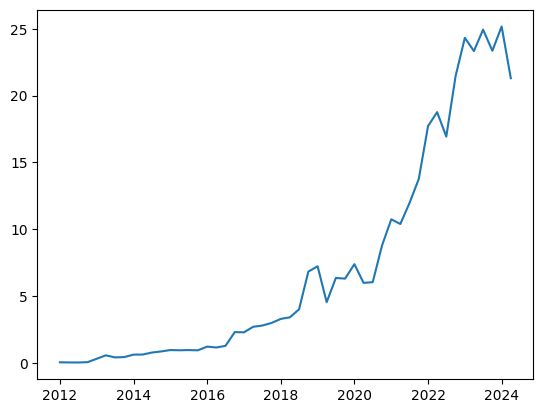

In [16]:
# plotting the data

plt.plot(df['Date'], df['Value'])
plt.xticks()
plt.show()
